In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.metrics import accuracy_score, classification_report

In [3]:
home_invasion_officers = pd.read_csv("home_invasion_officers.csv")
non_home_invasion_officers = pd.read_csv("non_home_invasion_officers.csv")
home_invasion_officers["home_invasion"] = 1
home_invasion_officers

,officer_id,gender,race,appointed_date,rank,active,birth_year,civilian_allegation_percentile,honorable_mention_count,internal_allegation_percentile,trr_count,allegation_count,sustained_count,civilian_compliment_count,current_badge,discipline_count,major_award_count,unsustained_count,home_invasion
0,12554,M,White,1989-02-14,Sergeant of Police,No,1959,76.0564,15,83.9745,7,26,1,3,2545.0,1,2,11,1
1,21713,M,White,1991-12-02,Police Officer,Yes,1969,57.7487,10,0.0000,1,21,2,7,8467.0,2,0,12,1
2,24736,M,Black,2006-08-28,Police Officer,Yes,1980,87.0789,9,91.6384,20,13,0,1,15146.0,0,0,4,1
3,8355,M,White,2012-10-31,Police Officer,Yes,1986,98.5998,52,0.0000,12,15,0,1,15220.0,0,0,1,1
4,1772,M,White,2002-03-25,Police Officer as Detective,Yes,1976,39.9143,5,0.0000,1,3,0,4,20807.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10234,30336,M,White,2003-08-25,Police Officer,Yes,1967,82.9729,41,74.4170,18,13,1,3,15469.0,1,0,4,1
10235,6692,F,Hispanic,1982-08-30,Captain of Police,No,1960,34.6162,3,93.7081,0,15,1,3,31.0,0,0,9,1
10236,32388,M,White,2000-09-11,Sergeant of Police,Unknown,1976,76.8238,45,0.0000,5,12,0,6,1426.0,0,0,5,1
10237,2536,F,White,1994-05-02,Police Officer,No,1950,53.0197,3,79.9133,4,12,4,7,3748.0,4,0,6,1


In [4]:
non_home_invasion_officers["home_invasion"] = 0
non_home_invasion_officers_balanced = non_home_invasion_officers.sample(n=10239)
non_home_invasion_officers

,officer_id,gender,race,appointed_date,rank,active,birth_year,civilian_allegation_percentile,honorable_mention_count,internal_allegation_percentile,trr_count,allegation_count,sustained_count,civilian_compliment_count,current_badge,discipline_count,major_award_count,unsustained_count,home_invasion
0,1,M,White,2005-09-26,Sergeant of Police,Yes,1971,61.2069,61,76.9384,7,6,0,4,1424.0,0,0,0,0
1,2,F,Hispanic,2005-09-26,Police Officer,Yes,1980,76.4252,71,0.0000,4,8,0,2,20373.0,0,0,2,0
2,4,M,White,1969-01-06,Police Officer as Detective,No,1942,58.8524,0,0.0000,0,7,0,1,NaN,0,0,2,0
3,6,M,White,1994-12-05,Police Officer,No,1968,38.7292,2,89.6420,2,6,2,0,18601.0,0,0,2,0
4,7,M,White,1995-12-04,Police Officer,Yes,1972,41.5139,9,61.1521,5,8,0,3,19596.0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16287,33845,F,Black,NaN,NaN,Unknown,1983,NaN,0,NaN,0,1,0,0,NaN,0,0,0,0
16288,33846,M,Hispanic,NaN,NaN,Unknown,1970,NaN,0,NaN,0,1,0,0,NaN,0,0,1,0
16289,33847,F,White,NaN,NaN,Unknown,1963,NaN,0,NaN,0,1,0,0,NaN,0,0,1,0
16290,33848,M,White,NaN,NaN,Unknown,1966,NaN,0,NaN,0,1,0,0,NaN,0,0,0,0


In [6]:
frames = [home_invasion_officers, non_home_invasion_officers]  # could also used balanced here, but that did not end up helping.
officers = pd.concat(frames)
officers

,officer_id,gender,race,appointed_date,rank,active,birth_year,civilian_allegation_percentile,honorable_mention_count,internal_allegation_percentile,trr_count,allegation_count,sustained_count,civilian_compliment_count,current_badge,discipline_count,major_award_count,unsustained_count,home_invasion
0,12554,M,White,1989-02-14,Sergeant of Police,No,1959,76.0564,15,83.9745,7,26,1,3,2545.0,1,2,11,1
1,21713,M,White,1991-12-02,Police Officer,Yes,1969,57.7487,10,0.0000,1,21,2,7,8467.0,2,0,12,1
2,24736,M,Black,2006-08-28,Police Officer,Yes,1980,87.0789,9,91.6384,20,13,0,1,15146.0,0,0,4,1
3,8355,M,White,2012-10-31,Police Officer,Yes,1986,98.5998,52,0.0000,12,15,0,1,15220.0,0,0,1,1
4,1772,M,White,2002-03-25,Police Officer as Detective,Yes,1976,39.9143,5,0.0000,1,3,0,4,20807.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14512,29831,M,Black,1993-05-17,Police Officer,No,1946,99.5919,21,78.9146,12,74,2,0,15967.0,2,1,43,0
645,1225,M,Hispanic,2013-05-01,Police Officer,Yes,1977,89.4808,4,0.0000,0,4,0,2,5941.0,0,0,0,0
5153,10444,F,White,1994-12-05,Sergeant of Police,No,1956,79.3204,8,0.0000,2,20,1,7,977.0,1,1,8,0
2323,4638,M,White,1995-08-07,Police Officer,Yes,1965,92.8393,48,61.1521,7,44,2,6,15202.0,2,0,31,0


## One Hot Encoding

In [7]:
numerical_officers = officers
one_hot_gender = pd.get_dummies(numerical_officers.gender)
one_hot_race = pd.get_dummies(numerical_officers.race)
one_hot_active = pd.get_dummies(numerical_officers.active)
numerical_officers = officers[['birth_year', 'honorable_mention_count',
                         'trr_count', 'sustained_count', 'civilian_compliment_count',
                         'discipline_count']].copy()
# print(one_hot_gender)
# print(one_hot_race)
# print(one_hot_active)
numerical_officers['female'] = one_hot_gender['F']
numerical_officers['male'] = one_hot_gender['M']
numerical_officers['Asian/Pacific'] = one_hot_race['Asian/Pacific']
numerical_officers['Black'] = one_hot_race['Black']
numerical_officers['Hispanic'] = one_hot_race['Hispanic']
numerical_officers['Native American/Alaskan Native'] = one_hot_race['Native American/Alaskan Native']
numerical_officers['Unknown_Race'] = one_hot_race['Unknown']
numerical_officers['White'] = one_hot_race['White']
numerical_officers['Active'] = one_hot_active['Yes']
numerical_officers['Inactive'] = one_hot_active['No']
numerical_officers['Unknown_Active'] = one_hot_active['Unknown']
numerical_officers


,birth_year,honorable_mention_count,trr_count,sustained_count,civilian_compliment_count,discipline_count,female,male,Asian/Pacific,Black,Hispanic,Native American/Alaskan Native,Unknown_Race,White,Active,Inactive,Unknown_Active
0,1959,15,7,1,3,1,0,1,0,0,0,0,0,1,0,1,0
1,1969,10,1,2,7,2,0,1,0,0,0,0,0,1,1,0,0
2,1980,9,20,0,1,0,0,1,0,1,0,0,0,0,1,0,0
3,1986,52,12,0,1,0,0,1,0,0,0,0,0,1,1,0,0
4,1976,5,1,0,4,0,0,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14512,1946,21,12,2,0,2,0,1,0,1,0,0,0,0,0,1,0
645,1977,4,0,0,2,0,0,1,0,0,1,0,0,0,1,0,0
5153,1956,8,2,1,7,1,1,0,0,0,0,0,0,1,0,1,0
2323,1965,48,7,2,6,2,0,1,0,0,0,0,0,1,1,0,0


In [8]:
y = officers["home_invasion"].to_numpy()
y

array([1, 1, 1, ..., 0, 0, 0])

In [9]:
X = numerical_officers.to_numpy()
X

array([[1959,   15,    7, ...,    0,    1,    0],
       [1969,   10,    1, ...,    1,    0,    0],
       [1980,    9,   20, ...,    1,    0,    0],
       ...,
       [1956,    8,    2, ...,    0,    1,    0],
       [1965,   48,    7, ...,    1,    0,    0],
       [1951,    2,    0, ...,    0,    1,    0]])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
print(X_test)
print(X_train)

[[ 1.577406   -0.58724456 -0.52193433 ...  0.76762691 -0.68404762
  -0.23422544]
 [ 1.11766438  1.21581802  3.05507003 ...  0.76762691 -0.68404762
  -0.23422544]
 [ 0.10623281  1.06038159  0.05038637 ...  0.76762691 -0.68404762
  -0.23422544]
 ...
 [ 0.84181941  0.96711974  0.76578724 ...  0.76762691 -0.68404762
  -0.23422544]
 [ 0.10623281 -0.49398271 -0.6650145  ...  0.76762691 -0.68404762
  -0.23422544]
 [ 0.47402611  2.24169846 -0.0926938  ...  0.76762691 -0.68404762
  -0.23422544]]
[[ 1.11766438  0.96711974  1.91042864 ...  0.76762691 -0.68404762
  -0.23422544]
 [ 0.84181941 -0.12093527 -0.52193433 ... -1.30271619  1.46188653
  -0.23422544]
 [ 0.29012946 -0.2763717  -0.6650145  ...  0.76762691 -0.68404762
  -0.23422544]
 ...
 [-1.54883703 -0.61833185 -0.52193433 ... -1.30271619  1.46188653
  -0.23422544]
 [ 1.39350935  0.09667573  0.76578724 ...  0.76762691 -0.68404762
  -0.23422544]
 [ 1.30156103 -0.43180813 -0.0926938  ...  0.76762691 -0.68404762
  -0.23422544]]


In [13]:
LSVC = LinearSVC(max_iter = 10000, dual=False)

LSVC.fit(X_train, y_train)
y_test_LSVC_model = LSVC.predict(X_test)
print("LSVC Accuracy :", accuracy_score(y_test, y_test_LSVC_model))

LSVC Accuracy : 0.561279296875


<Figure size 1440x1440 with 0 Axes>

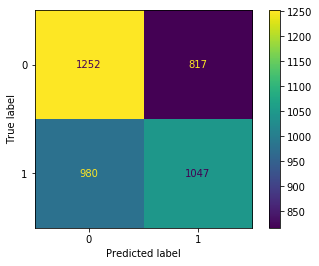

In [14]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(LSVC, X_test, y_test)
plt.show()

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier

gnb = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors=1)
MNB = MultinomialNB()
BNB = BernoulliNB()
LR = LogisticRegression()
SDG = SGDClassifier()
SVC = SVC()
NSVC = NuSVC()

GaussianNB Accuracy : 0.494140625


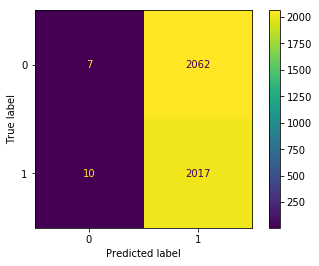

KNN Accuracy : 0.287353515625


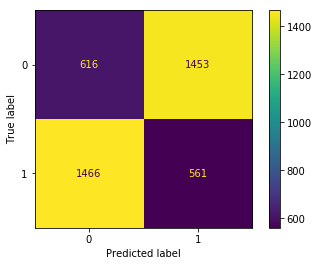

BNB Accuracy : 0.558349609375


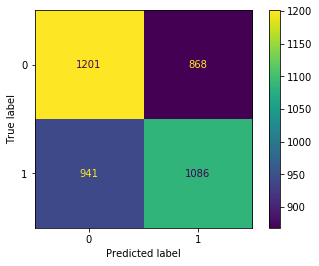

LR Accuracy : 0.561767578125


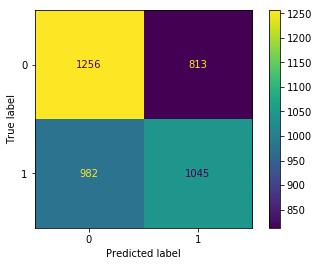

SDG Accuracy : 0.501708984375


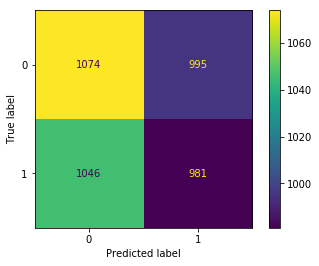

SVC Accuracy : 0.5595703125


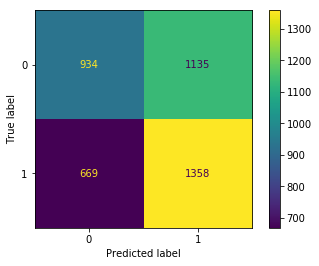

In [16]:
# Train our classifier and test predict
gnb.fit(X_train, y_train)
y_test_GNB_model = gnb.predict(X_test)
print("GaussianNB Accuracy :", accuracy_score(y_test, y_test_GNB_model))
plot_confusion_matrix(gnb, X_test, y_test)
plt.show()

KNN.fit(X_train,y_train)
y_test_KNN_model = KNN.predict(X_test)
print("KNN Accuracy :", accuracy_score(y_test, y_test_KNN_model))
plot_confusion_matrix(KNN, X_test, y_test)
plt.show()

#MNB.fit(X_train,y_train)
#y_test_MNB_model = MNB.predict(X_test)
#print("MNB Accuracy :", accuracy_score(y_test, y_test_MNB_model))
# plot_confusion_matrix(MNB, X_test, y_test)
# plt.show()

BNB.fit(X_train,y_train)
y_test_BNB_model = BNB.predict(X_test)
print("BNB Accuracy :", accuracy_score(y_test, y_test_BNB_model))
plot_confusion_matrix(BNB, X_test, y_test)
plt.show()

LR.fit(X_train,y_train)
y_test_LR_model = LR.predict(X_test)
print("LR Accuracy :", accuracy_score(y_test, y_test_LR_model))
plot_confusion_matrix(LR, X_test, y_test)
plt.show()

SDG.fit(X_train,y_train)
y_test_SDG_model = SDG.predict(X_test)
print("SDG Accuracy :", accuracy_score(y_test, y_test_SDG_model))
plot_confusion_matrix(SDG, X_test, y_test)
plt.show()

SVC.fit(X_train,y_train)
y_test_SVC_model = SVC.predict(X_test)
print("SVC Accuracy :", accuracy_score(y_test, y_test_SVC_model))
plot_confusion_matrix(SVC, X_test, y_test)
plt.show()


In [17]:
from sklearn.model_selection import GridSearchCV
model = SVC
clf = GridSearchCV(model, parameters, return_train_score = True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('best accuracy: ',accuracy_score(y_test, y_pred) )
clf.best_estimator_

NameError: name 'parameters' is not defined